# Cleaning NBA Box Score Data

In this project I am going to be importing a few different data sets around NBA box scores.  I am going to want to be narrowing this down to 2017 - 2018 and limiting it to the Portland Trail Blazers.  I will be looking at doing the following to make this data more managable.

* Import all data sets and combine them
* Remove uneeded and duplicate features and find the features that are the most useful.
* Fix Structural Errors
* Fill in missing data
* Normalize data

*** Revision, after looking at both datasets it looks like we can get the most useful information from the team data and dont need to have both player and team info.  I will only import team info this time. ***

## 1. Import Data

The first step is going to be to import both datasets for the NBA box scores.  

In [155]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load datasets
team_box_score = '/Users/jordan.kasper/Desktop/ML_Projects/nba_box_score/teamBoxScore.csv'

df = read_csv(team_box_score)

## 2. Reviewing the Data

After importing the data we are going to take a quick look at the raw data to see what we are dealing with.  

In [156]:
# looking at the size of the data

print(df.shape)

(2460, 123)


In [157]:
# reviewing the column headers

print(df.columns.values)

['gmDate' 'gmTime' 'seasTyp' 'offLNm1' 'offFNm1' 'offLNm2' 'offFNm2'
 'offLNm3' 'offFNm3' 'teamAbbr' 'teamConf' 'teamDiv' 'teamLoc' 'teamRslt'
 'teamMin' 'teamDayOff' 'teamPTS' 'teamAST' 'teamTO' 'teamSTL' 'teamBLK'
 'teamPF' 'teamFGA' 'teamFGM' 'teamFG%' 'team2PA' 'team2PM' 'team2P%'
 'team3PA' 'team3PM' 'team3P%' 'teamFTA' 'teamFTM' 'teamFT%' 'teamORB'
 'teamDRB' 'teamTRB' 'teamPTS1' 'teamPTS2' 'teamPTS3' 'teamPTS4'
 'teamPTS5' 'teamPTS6' 'teamPTS7' 'teamPTS8' 'teamTREB%' 'teamASST%'
 'teamTS%' 'teamEFG%' 'teamOREB%' 'teamDREB%' 'teamTO%' 'teamSTL%'
 'teamBLK%' 'teamBLKR' 'teamPPS' 'teamFIC' 'teamFIC40' 'teamOrtg'
 'teamDrtg' 'teamEDiff' 'teamPlay%' 'teamAR' 'teamAST/TO' 'teamSTL/TO'
 'opptAbbr' 'opptConf' 'opptDiv' 'opptLoc' 'opptRslt' 'opptMin'
 'opptDayOff' 'opptPTS' 'opptAST' 'opptTO' 'opptSTL' 'opptBLK' 'opptPF'
 'opptFGA' 'opptFGM' 'opptFG%' 'oppt2PA' 'oppt2PM' 'oppt2P%' 'oppt3PA'
 'oppt3PM' 'oppt3P%' 'opptFTA' 'opptFTM' 'opptFT%' 'opptORB' 'opptDRB'
 'opptTRB' 'opptPTS1' 'oppt

## 3. Feature Selection

Here we will remove any columns that we do not need to help solve our question.  We will also remove any rows that do not deal with Portland's players.

In [158]:
# removing teams that are not Portland

port_team_df = df.loc[df['teamAbbr'] == 'POR']

In [159]:
# reviewing the new shape

print(port_team_df.shape)

(82, 123)


In [160]:
port_team_df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
22,2017-10-18,10:00,Regular,Orr,J.T.,Williams,James,Mott,Rodney,POR,...,24.6888,76.2205,124.3598,-48.1393,0.2947,8.1354,0.6250,56.2500,99.7107,98.8866
34,2017-10-20,07:00,Regular,Workman,Haywoode,Zielinski,Gary,Brown,Tony,POR,...,46.1458,98.5157,116.9874,-18.4717,0.4167,12.5502,1.2500,8.3333,97.4464,97.4464
66,2017-10-21,08:30,Regular,Voyard-Tadal,Vladimir,Barnaky,Brent,Zarba,Zach,POR,...,68.2008,117.6475,114.5242,3.1233,0.4828,17.0279,1.5714,64.2857,96.0496,96.0496
105,2017-10-24,10:00,Regular,Kennedy,Bill,Richardson,Derek,Ayotte,Mark,POR,...,46.0581,91.5944,101.4433,-9.8489,0.3371,13.7008,1.0000,29.4118,101.5346,101.5346
135,2017-10-26,10:00,Regular,Fitzgerald,Kane,Cutler,Kevin,Taylor,Ben,POR,...,57.4689,117.3021,116.1741,1.1280,0.4800,9.4959,0.9167,33.3333,88.6600,88.2921


Now that we have cleaned up the non Portland teams we are going to remove the following columns that dont deal with Portland's usable features

In [161]:
port_df = port_team_df.filter(['teamTREB%','teamASST% ','teamTS%','teamEFG%','teamOREB%','teamDREB%','teamTO%','teamSTL%','teamFIC','teamOrtg','teamDrtg','teamEDiff','teamFT%','team3P%','team2P%','teamFG%','opptTREB%','opptASST% ','opptTS%','opptEFG%','opptOREB%','opptDREB%','opptTO%','opptSTL%','opptFIC','opptOrtg','opptDrtg','opptEDiff','opptFT%','oppt3P%','oppt2P%','opptFG%','teamRslt'], axis=1)

In [162]:
port_df.head()

,teamTREB%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamFIC,teamOrtg,teamDrtg,...,opptSTL%,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptFT%,oppt3P%,oppt2P%,opptFG%,teamRslt
22,63.3333,0.6059,0.5667,39.4737,80.7692,14.9601,8.0232,101.500,124.3598,76.2205,...,9.0261,29.750,76.2205,124.3598,-48.1393,0.7222,0.2593,0.3387,0.3146,Win
34,56.6667,0.5562,0.5316,25.0000,86.9565,8.0732,5.1310,85.375,116.9874,98.5157,...,1.0262,55.375,98.5157,116.9874,-18.4717,0.6667,0.2222,0.5167,0.4487,Win
66,55.2632,0.5765,0.4938,32.5000,80.5556,14.3627,10.4113,78.625,114.5242,117.6475,...,9.3702,81.500,117.6475,114.5242,3.1233,0.7333,0.3889,0.5645,0.5250,Loss
105,60.0000,0.5023,0.4318,32.1429,91.8367,15.6353,6.8942,77.375,101.4433,91.5944,...,4.9244,55.500,91.5944,101.4433,-9.8489,0.7500,0.3000,0.4565,0.3947,Win
135,48.8889,0.5219,0.4719,33.3333,66.6667,9.2013,5.6395,70.000,116.1741,117.3021,...,4.5116,69.250,117.3021,116.1741,1.1280,0.6389,0.3214,0.5510,0.4675,Loss


In [163]:
c = port_df.corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort').where(s > .1)
so = so.sort_values(kind='quicksort').where(s < .9)

newSo = so.dropna()
print(newSo)


opptFT%    opptDrtg     0.100829
teamOrtg   opptFT%      0.100829
opptFT%    teamOrtg     0.100829
opptDrtg   opptFT%      0.100829
teamFT%    opptTO%      0.102034
opptTO%    teamFT%      0.102034
opptFT%    teamFG%      0.102093
teamFG%    opptFT%      0.102093
teamEFG%   opptFG%      0.103965
opptFG%    teamEFG%     0.103965
opptFT%    teamTS%      0.106064
teamTS%    opptFT%      0.106064
teamEFG%   teamOREB%    0.106208
teamOREB%  teamEFG%     0.106208
team3P%    opptEFG%     0.107006
opptEFG%   team3P%      0.107006
opptFIC    opptSTL%     0.109367
opptSTL%   opptFIC      0.109367
teamDrtg   opptDREB%    0.110218
opptDREB%  opptOrtg     0.110218
           teamDrtg     0.110218
opptOrtg   opptDREB%    0.110218
opptOREB%  opptOrtg     0.110218
opptOrtg   opptOREB%    0.110218
opptOREB%  teamDrtg     0.110218
teamDrtg   opptOREB%    0.110218
opptFT%    teamEFG%     0.110458
teamEFG%   opptFT%      0.110458
teamDREB%  oppt3P%      0.111576
oppt3P%    teamDREB%    0.111576
          

In [164]:
import numpy as np

corr = port_df.corr()
corr.style.background_gradient()

,teamTREB%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamFIC,teamOrtg,teamDrtg,teamEDiff,teamFT%,team3P%,team2P%,teamFG%,opptTREB%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptFT%,oppt3P%,oppt2P%,opptFG%
teamTREB%,1,0.385442,0.289663,0.536311,0.662475,0.371282,-0.195341,0.420564,0.354749,-0.287303,0.561419,0.305257,0.297754,0.131163,0.266514,-1,-0.22203,-0.231719,-0.251986,0.251986,-0.220522,0.151261,-0.491392,-0.287303,0.354749,-0.561419,-0.117734,-0.249318,-0.0791464,-0.21872
teamTS%,0.385442,1,0.960844,-0.0728349,0.0862422,0.258668,-0.213025,0.620947,0.816702,0.249515,0.445411,0.212138,0.601947,0.660952,0.918305,-0.385442,0.154229,0.126148,0.267399,-0.267399,-0.275378,0.124713,-0.159732,0.249515,0.816702,-0.445411,0.106064,0.200812,-0.0115647,0.0853247
teamEFG%,0.289663,0.960844,1,-0.106208,0.012748,0.225699,-0.219794,0.595295,0.78047,0.272083,0.394371,0.0832843,0.616203,0.693146,0.961414,-0.289663,0.166443,0.144235,0.302018,-0.302018,-0.264408,0.133566,-0.112881,0.272083,0.78047,-0.394371,0.110458,0.203906,0.0110898,0.103965
teamOREB%,0.536311,-0.0728349,-0.106208,1,0.0915777,0.0195849,0.14232,0.214622,0.24155,-0.0221814,0.220987,0.203406,0.0485399,-0.195074,-0.152501,-0.536311,0.0206638,-0.00582239,-0.0289078,0.0289078,0.0887478,-0.0100285,-0.121314,-0.0221814,0.24155,-0.220987,-0.0311929,-0.242881,0.192348,0.0639905
teamDREB%,0.662475,0.0862422,0.012748,0.0915777,1,0.0666553,-0.20883,0.165554,0.068223,-0.249665,0.288753,0.194501,0.0829871,-0.0224904,-0.00027432,-0.662475,0.0413476,0.0506187,-0.849779,0.849779,-0.0620904,0.0743179,-0.226131,-0.249665,0.068223,-0.288753,-0.083331,-0.111576,0.14046,0.0647929
teamTO%,0.371282,0.258668,0.225699,0.0195849,0.0666553,1,-0.0453215,-0.262909,-0.233684,-0.266175,0.0536807,-0.0102679,0.195039,0.0896844,0.207681,-0.371282,-0.294515,-0.300727,0.210946,-0.210946,-0.0100443,0.705002,-0.337402,-0.266175,-0.233684,-0.0536807,0.00253799,-0.133182,-0.221617,-0.296056
teamSTL%,-0.195341,-0.213025,-0.219794,0.14232,-0.20883,-0.0453215,1,0.00845653,-0.149616,-0.231905,0.0915457,0.14954,-0.325571,0.0128478,-0.164177,0.195341,-0.0474826,-0.0815055,0.0791329,-0.0791329,0.679342,-0.0986441,-0.125597,-0.231905,-0.149616,-0.0915457,0.2202,-0.0387017,-0.0559878,-0.0347426
teamFIC,0.420564,0.620947,0.595295,0.214622,0.165554,-0.262909,0.00845653,1,0.794081,0.0286151,0.632063,0.284631,0.419569,0.401063,0.555536,-0.420564,-0.0350624,-0.0567731,0.0823592,-0.0823592,-0.209671,-0.30454,-0.148863,0.0286151,0.794081,-0.632063,0.0669671,0.0343716,-0.112556,-0.0731883
teamOrtg,0.354749,0.816702,0.78047,0.24155,0.068223,-0.233684,-0.149616,0.794081,1,0.358308,0.496286,0.275631,0.537198,0.495745,0.71406,-0.354749,0.299159,0.260693,0.151369,-0.151369,-0.238632,-0.221188,-0.0244288,0.358308,1,-0.496286,0.100829,0.17985,0.15379,0.238909
teamDrtg,-0.287303,0.249515,0.272083,-0.0221814,-0.249665,-0.266175,-0.231905,0.0286151,0.358308,1,-0.632694,-0.00390964,-0.0195806,0.321745,0.276494,0.287303,0.870479,0.831528,0.110218,-0.110218,-0.341845,0.0445877,0.796461,1,0.358308,0.632694,0.172104,0.521174,0.544901,0.762629


## 4. Evaluating Algorithms

### 4.1 Seperate out a Validation Dataset

In [170]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split

array = port_df.values
X = array[:,:-9]
Y = array[:,-1]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [169]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)

    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

    print(msg)

LR: 0.926190 (0.097851)
LDA: 0.869048 (0.149546)
KNN: 0.914286 (0.130931)
NB: 0.900000 (0.143570)
SVM: 0.602381 (0.144847)


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

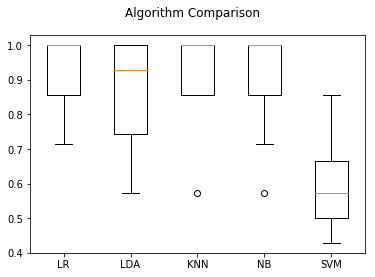

In [171]:
from matplotlib import pyplot

fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 

pyplot.show()

In [172]:
regressor = LogisticRegression()
regressor.fit(X_train,Y_train)
accuracy = regressor.score(X_validation,Y_validation)
print(accuracy*100,'%')

100.0 %


In [174]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

In [176]:
print(predictions)
print(Y_validation)

['Win' 'Loss' 'Win' 'Loss' 'Loss' 'Win' 'Win' 'Win' 'Loss' 'Loss' 'Win'
 'Win' 'Win' 'Loss' 'Win' 'Loss' 'Win']
['Win' 'Loss' 'Win' 'Loss' 'Loss' 'Win' 'Win' 'Win' 'Loss' 'Loss' 'Win'
 'Win' 'Win' 'Loss' 'Win' 'Loss' 'Win']


# Conclusion

In conclusion we are able to predict with high accuracy using a Logistic Regression.  To imporve this further we will want to remove more of the collinear variables to make this more accurate.  